In [68]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [69]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [70]:
path=r'/Users/Dimitris/Desktop/CF Data Analytics/Data Immersion/Achievement 6/02 Data'

## Step 2

In [71]:
# Import the “df_sub.pkl” file into Jupyter as df_sub

df_sub = pd.read_pickle(os.path.join(path, 'Prepared Data', 'df_sub.pkl'))

In [72]:
df_sub.columns

Index(['trip_duration', 'start_time', 'stop_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'birth_year', 'gender', 'age', 'age_group_loc',
       'trip_duration_range_loc', 'station_users', 'day_of_week',
       'hour_of_day'],
      dtype='object')

In [73]:
df_sub.dtypes

trip_duration                     float64
start_time                 datetime64[ns]
stop_time                  datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
birth_year                        float64
gender                             object
age                               float64
age_group_loc                      object
trip_duration_range_loc            object
station_users                      object
day_of_week                        object
hour_of_day                         int64
dtype: object

In [74]:
# Deleting rows where the trip_duration is over 1440 minutes (24 hours) to focus on the daily trips

df_sub.drop(df_sub[df_sub.trip_duration > 1440].index, inplace=True)

In [75]:
# Delete NaNs

df_sub.dropna(inplace=True)

In [76]:
# Create a new dataframe with numerical values only 

df_ml = df_sub[['trip_duration', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'birth_year', 'age', 'hour_of_day']]

In [77]:
df_ml.head()

,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,birth_year,age,hour_of_day
0,11.333333,3226.0,40.782750,-73.971370,3165.0,40.775794,-73.976206,25542,1965.0,52.0,0
8,4.250000,430.0,40.701485,-73.986569,242.0,40.697787,-73.973736,25041,1989.0,28.0,0
12,33.416667,524.0,40.755273,-73.983169,3325.0,40.784903,-73.950503,17171,1992.0,25.0,0
16,14.983333,515.0,40.760094,-73.994618,3428.0,40.740983,-74.001702,15597,1970.0,47.0,0
20,5.850000,3139.0,40.771183,-73.964094,3146.0,40.775730,-73.956753,26491,1984.0,33.0,0


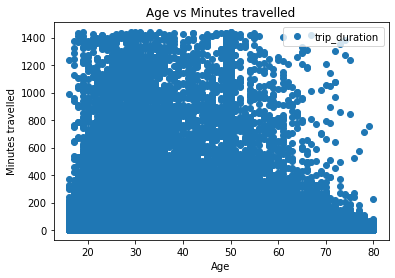

In [78]:
df_ml.plot(x = 'age', y='trip_duration',style='o')
plt.title('Age vs Minutes travelled')  
plt.xlabel('Age')  
plt.ylabel('Minutes travelled')  
plt.show()

In [79]:
# Standardizing the data

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_ml)

In [80]:
# Dimentionality reduction with PCA

pca = PCA()
pca.fit(df_ml)

PCA()

In [81]:
pca.explained_variance_ratio_

array([9.22728519e-01, 5.24280486e-02, 2.48291846e-02, 8.59019196e-06,
       5.20997199e-06, 4.41162803e-07, 5.09530921e-09, 1.66250039e-09,
       1.27052001e-10, 2.90368278e-11, 3.08561360e-12])

Text(0, 0.5, 'Cumulative explained variance')

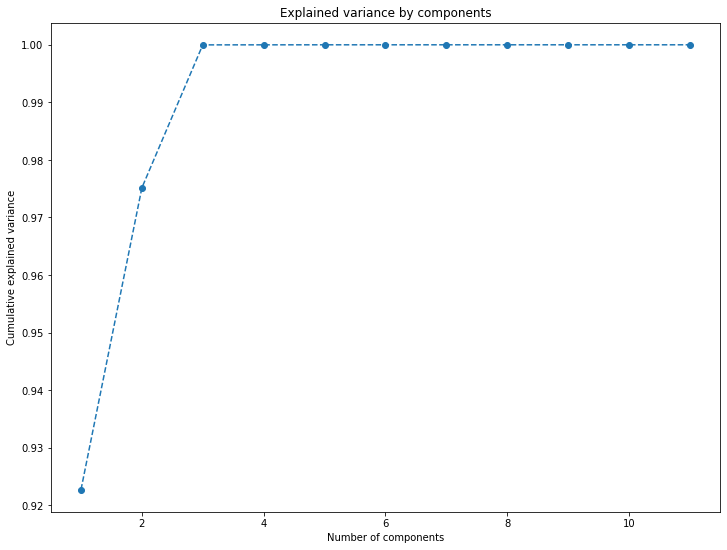

In [82]:
# Plot the cumulative variance explained by total number of components.

plt.figure(figsize=(12,9))
plt.plot(range(1,12), pca.explained_variance_ratio_.cumsum(),marker = 'o', linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [83]:
# Keep the first 3 components.

pca = PCA(n_components = 3)

In [84]:
# Fit the model the data with the 3 components.

pca.fit(df_ml)

PCA(n_components=3)

## Step 3 - Use the elbow technique

In [85]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [86]:
# Creates a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(df_ml).score(df_ml) for i in range(len(kmeans))]

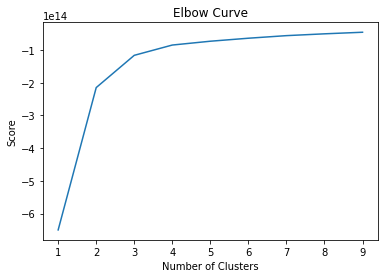

In [87]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Ater three on the x-axis the curve starts to straighten out. This means that the optimal count for the clusters is three.

## Step 5. Run the k-means algorithm

In [88]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [89]:
# Fit the k-means object to the data.

kmeans.fit(df_ml)

KMeans(n_clusters=3)

In [90]:
df_ml['clusters'] = kmeans.fit_predict(df_ml)

/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_68861/1553420089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['clusters'] = kmeans.fit_predict(df_ml)


In [91]:
df_ml.head()

,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,birth_year,age,hour_of_day,clusters
0,11.333333,3226.0,40.782750,-73.971370,3165.0,40.775794,-73.976206,25542,1965.0,52.0,0,0
8,4.250000,430.0,40.701485,-73.986569,242.0,40.697787,-73.973736,25041,1989.0,28.0,0,0
12,33.416667,524.0,40.755273,-73.983169,3325.0,40.784903,-73.950503,17171,1992.0,25.0,0,1
16,14.983333,515.0,40.760094,-73.994618,3428.0,40.740983,-74.001702,15597,1970.0,47.0,0,1
20,5.850000,3139.0,40.771183,-73.964094,3146.0,40.775730,-73.956753,26491,1984.0,33.0,0,0


In [92]:
df_ml['clusters'].value_counts()

0    4953251
1    3657246
2    3526414
Name: clusters, dtype: int64

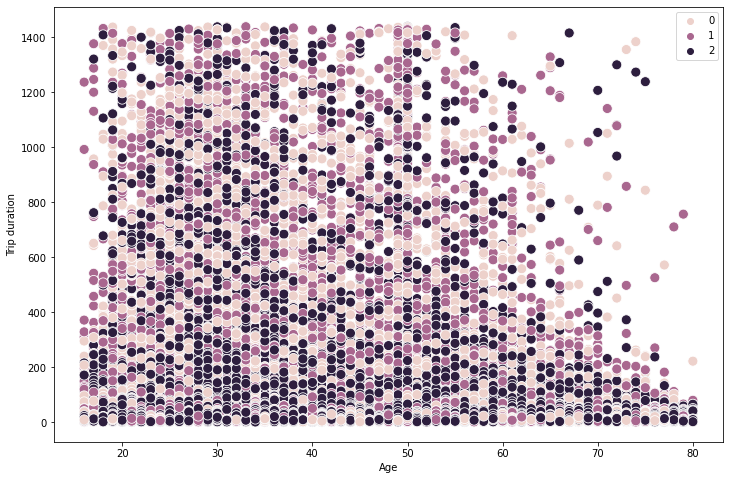

In [93]:
# Plot the clusters for the "Age" and "Trip duration" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ml['age'], y=df_ml['trip_duration'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Age') 
plt.ylabel('Trip duration')
plt.show()

/Users/Dimitris/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


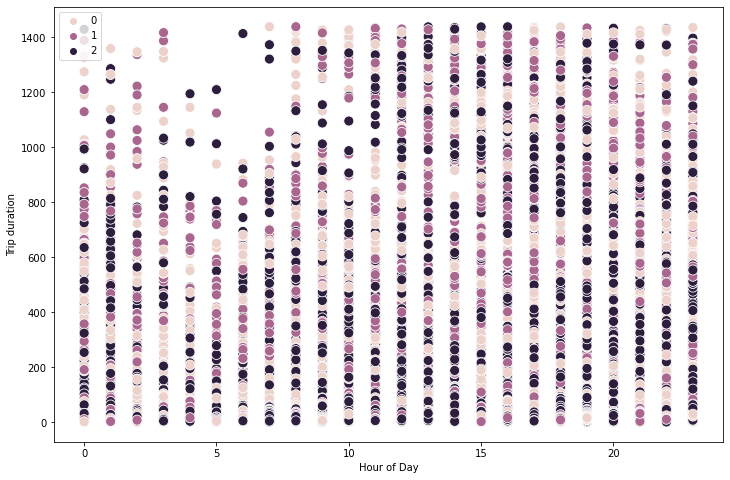

In [94]:
# Plot the clusters for the "Hour of day" and "Trip duration" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ml['hour_of_day'], y=df_ml['trip_duration'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Hour of Day') 
plt.ylabel('Trip duration')
plt.show()

In [95]:
df_ml.loc[df_ml['clusters'] == 2, 'cluster'] = 'dark purple'
df_ml.loc[df_ml['clusters'] == 1, 'cluster'] = 'purple'
df_ml.loc[df_ml['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/yl/zzz5svg15j310t2d1vvq8zqh0000gn/T/ipykernel_68861/2182134932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml.loc[df_ml['clusters'] == 2, 'cluster'] = 'dark purple'


/Users/Dimitris/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


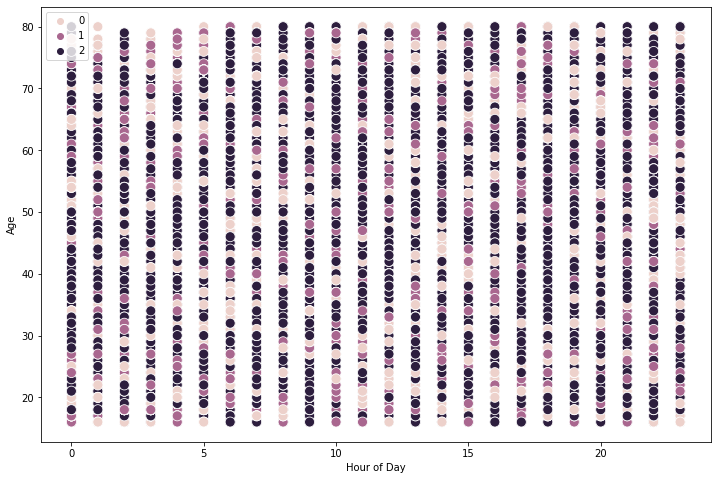

In [96]:
# Plot the clusters for the "Hour of day" and "Age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ml['hour_of_day'], y=df_ml['age'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Hour of Day') 
plt.ylabel('Age')
plt.show()

### I cannot discern any specific patterns from the clusters.

In [97]:
df_ml.groupby('cluster').agg({'trip_duration':['mean', 'median'], 
                         'hour_of_day':['mean', 'median'], 
                         'age':['mean', 'median']})

trip_duration            hour_of_day               age       
                     mean     median        mean median       mean median
cluster                                                                  
dark purple     14.042034  10.216667   13.795956   14.0  38.770283   36.0
pink            13.609410   9.883333   13.904577   15.0  38.391455   36.0
purple          13.826940   9.816667   13.892491   15.0  38.689995   36.0

### The statistics show that all 3 clusters are similar.